# Лабораторная работа 2.1 (шкалы измерения)

## Задание 1: Определение типа шкалы измерения
Создайте список, состоящий из различных типов данных (например, возраст, пол, уровень образования, зарплата и т.д.). Затем создайте функцию на Python, которая будет проходить через каждый элемент этого списка и определять тип шкалы измерения (номинативная, порядковая, интервальная, отношения).

In [33]:
import pandas as pd

dataset = pd.read_csv("onlinefoods.csv")

dataset

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [34]:
def check_all(column):
    if dataset[column].dtype == 'object' and check(dataset[column], object):
        return 'номинативная'
    if dataset[column].dtype == 'int64' and check(dataset[column], int):
        return 'порядковая'
    if (dataset[column].dtype == 'int64' and check(dataset[column], int)) or (dataset[column].dtype == 'float' and check(dataset[column], float)): 
        return 'интервальная'
    return 'неизвестная'


def check(list, dtype):
    for elem in list:
        if not isinstance(elem, dtype):
            return False
    return True


measurement_scales = []

for column in dataset.columns:
    scale_type = check_all(column)
    measurement_scales.append({
        "Измерение": column,
        "Тип": scale_type
    })

pd.DataFrame(measurement_scales)

,Измерение,Тип
0,Age,порядковая
1,Gender,номинативная
2,Marital Status,номинативная
3,Occupation,номинативная
4,Monthly Income,номинативная
5,Educational Qualifications,номинативная
6,Family size,порядковая
7,latitude,интервальная
8,longitude,интервальная
9,Pin code,порядковая


## Задание 2: Приведение данных к нужной шкале

Создайте датафрейм с данными, которые необходимо привести к номинативной или порядковой шкале. Создайте функцию на Python, которая преобразует эти данные в нужные шкалы.

In [35]:
df = dataset.copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

for column in df:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,0,0,0,0,4,12.9766,77.5993,560001,0,0,0
1,24,0,0,0,1,1,3,12.9770,77.5773,560009,0,0,0
2,22,1,0,0,1,0,3,12.9551,77.6593,560017,0,1,0
3,22,0,0,0,0,1,6,12.9473,77.5616,560019,0,0,0
4,22,1,0,0,1,0,4,12.9850,77.5533,560010,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,0,0,0,0,2,12.9766,77.5993,560001,0,0,0
384,23,0,0,0,0,0,4,12.9854,77.7081,560048,0,0,0
385,22,0,0,0,0,0,5,12.9850,77.5533,560010,0,0,0
386,23,1,0,0,1,0,2,12.9770,77.5773,560009,0,0,0


## Задание 3: Анализ данных с использованием различных шкал измерения

Создайте датафрейм с данными различных типов (к примеру, пол, возраст, уровень образования, баллы за тест). Проанализируйте эти данные с использованием функций Python, которые соответствуют типу шкалы каждого элемента данных (например, мода для номинативной шкалы, медиана для порядковой шкалы, среднее значение для интервальной и отношения).

In [36]:
def mode(column):
    return dataset[column].mode()[0]

def median(column):
    return dataset[column].median()

def mean(column):
    return dataset[column].mean()

table = []
for column in dataset.columns:
    scale = check_all(column)
    if scale == 'номинативная':
        mode_value = mode(column)
        table.append({ "Колонка": column, "Шкала": scale, "Мода": mode_value, "Медиана": "", "Среднее": "" })
    if scale == 'порядковая':
        median_value = median(column)
        table.append({ "Колонка": column, "Шкала": scale, "Медиана": median_value, "Мода": "", "Среднее": "" })
    if scale == 'интервальная':
        mean_value = mean(column)
        table.append({ "Колонка": column, "Шкала": scale, "Среднее": mean_value, "Медиана": "", "Мода": "" })

pd.DataFrame(table)

,Колонка,Шкала,Медиана,Мода,Среднее
0,Age,порядковая,24.0,,
1,Gender,номинативная,,Male,
2,Marital Status,номинативная,,Single,
3,Occupation,номинативная,,Student,
4,Monthly Income,номинативная,,No Income,
5,Educational Qualifications,номинативная,,Graduate,
6,Family size,порядковая,3.0,,
7,latitude,интервальная,,,12.972058
8,longitude,интервальная,,,77.60016
9,Pin code,порядковая,560033.5,,


## Задание 4: Визуализация данных в зависимости от шкалы измерения

Ваша задача создать визуализации для различных типов шкал. Возьмите набор данных и создайте различные виды диаграмм (например, столбчатые диаграммы для номинативной шкалы, гистограммы для порядковой, интервальной и шкалы отношений).

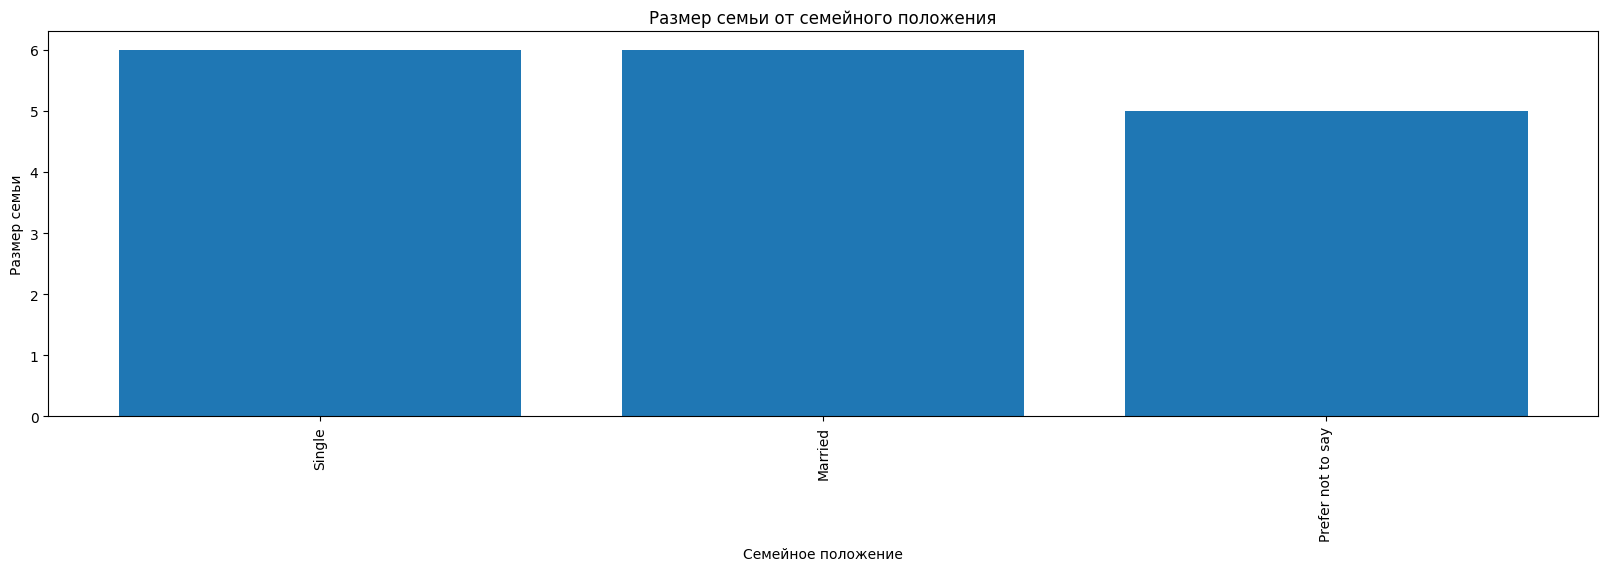

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# Визуализация столбчатой диаграммы для номинативной шкалы (страны)
plt.bar(dataset['Marital Status'], dataset['Family size'])
plt.xlabel('Семейное положение')
plt.ylabel('Размер семьи')
plt.title('Размер семьи от семейного положения')
plt.xticks(rotation=90)

plt.show()

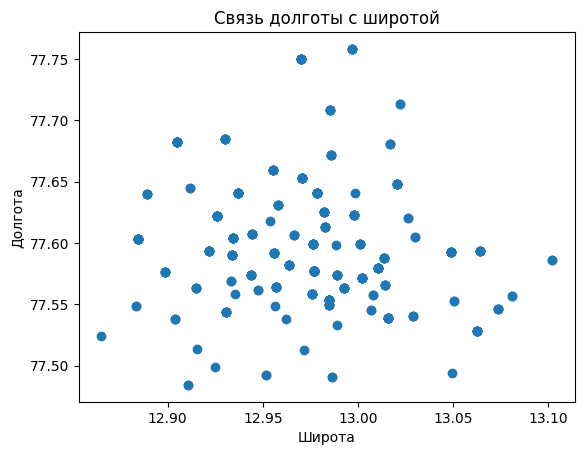

In [38]:
# Визуализация scatter plot для показателей экономики и здоровья
plt.scatter(dataset['latitude'], dataset['longitude'])
plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.title('Связь долготы с широтой')
plt.show()

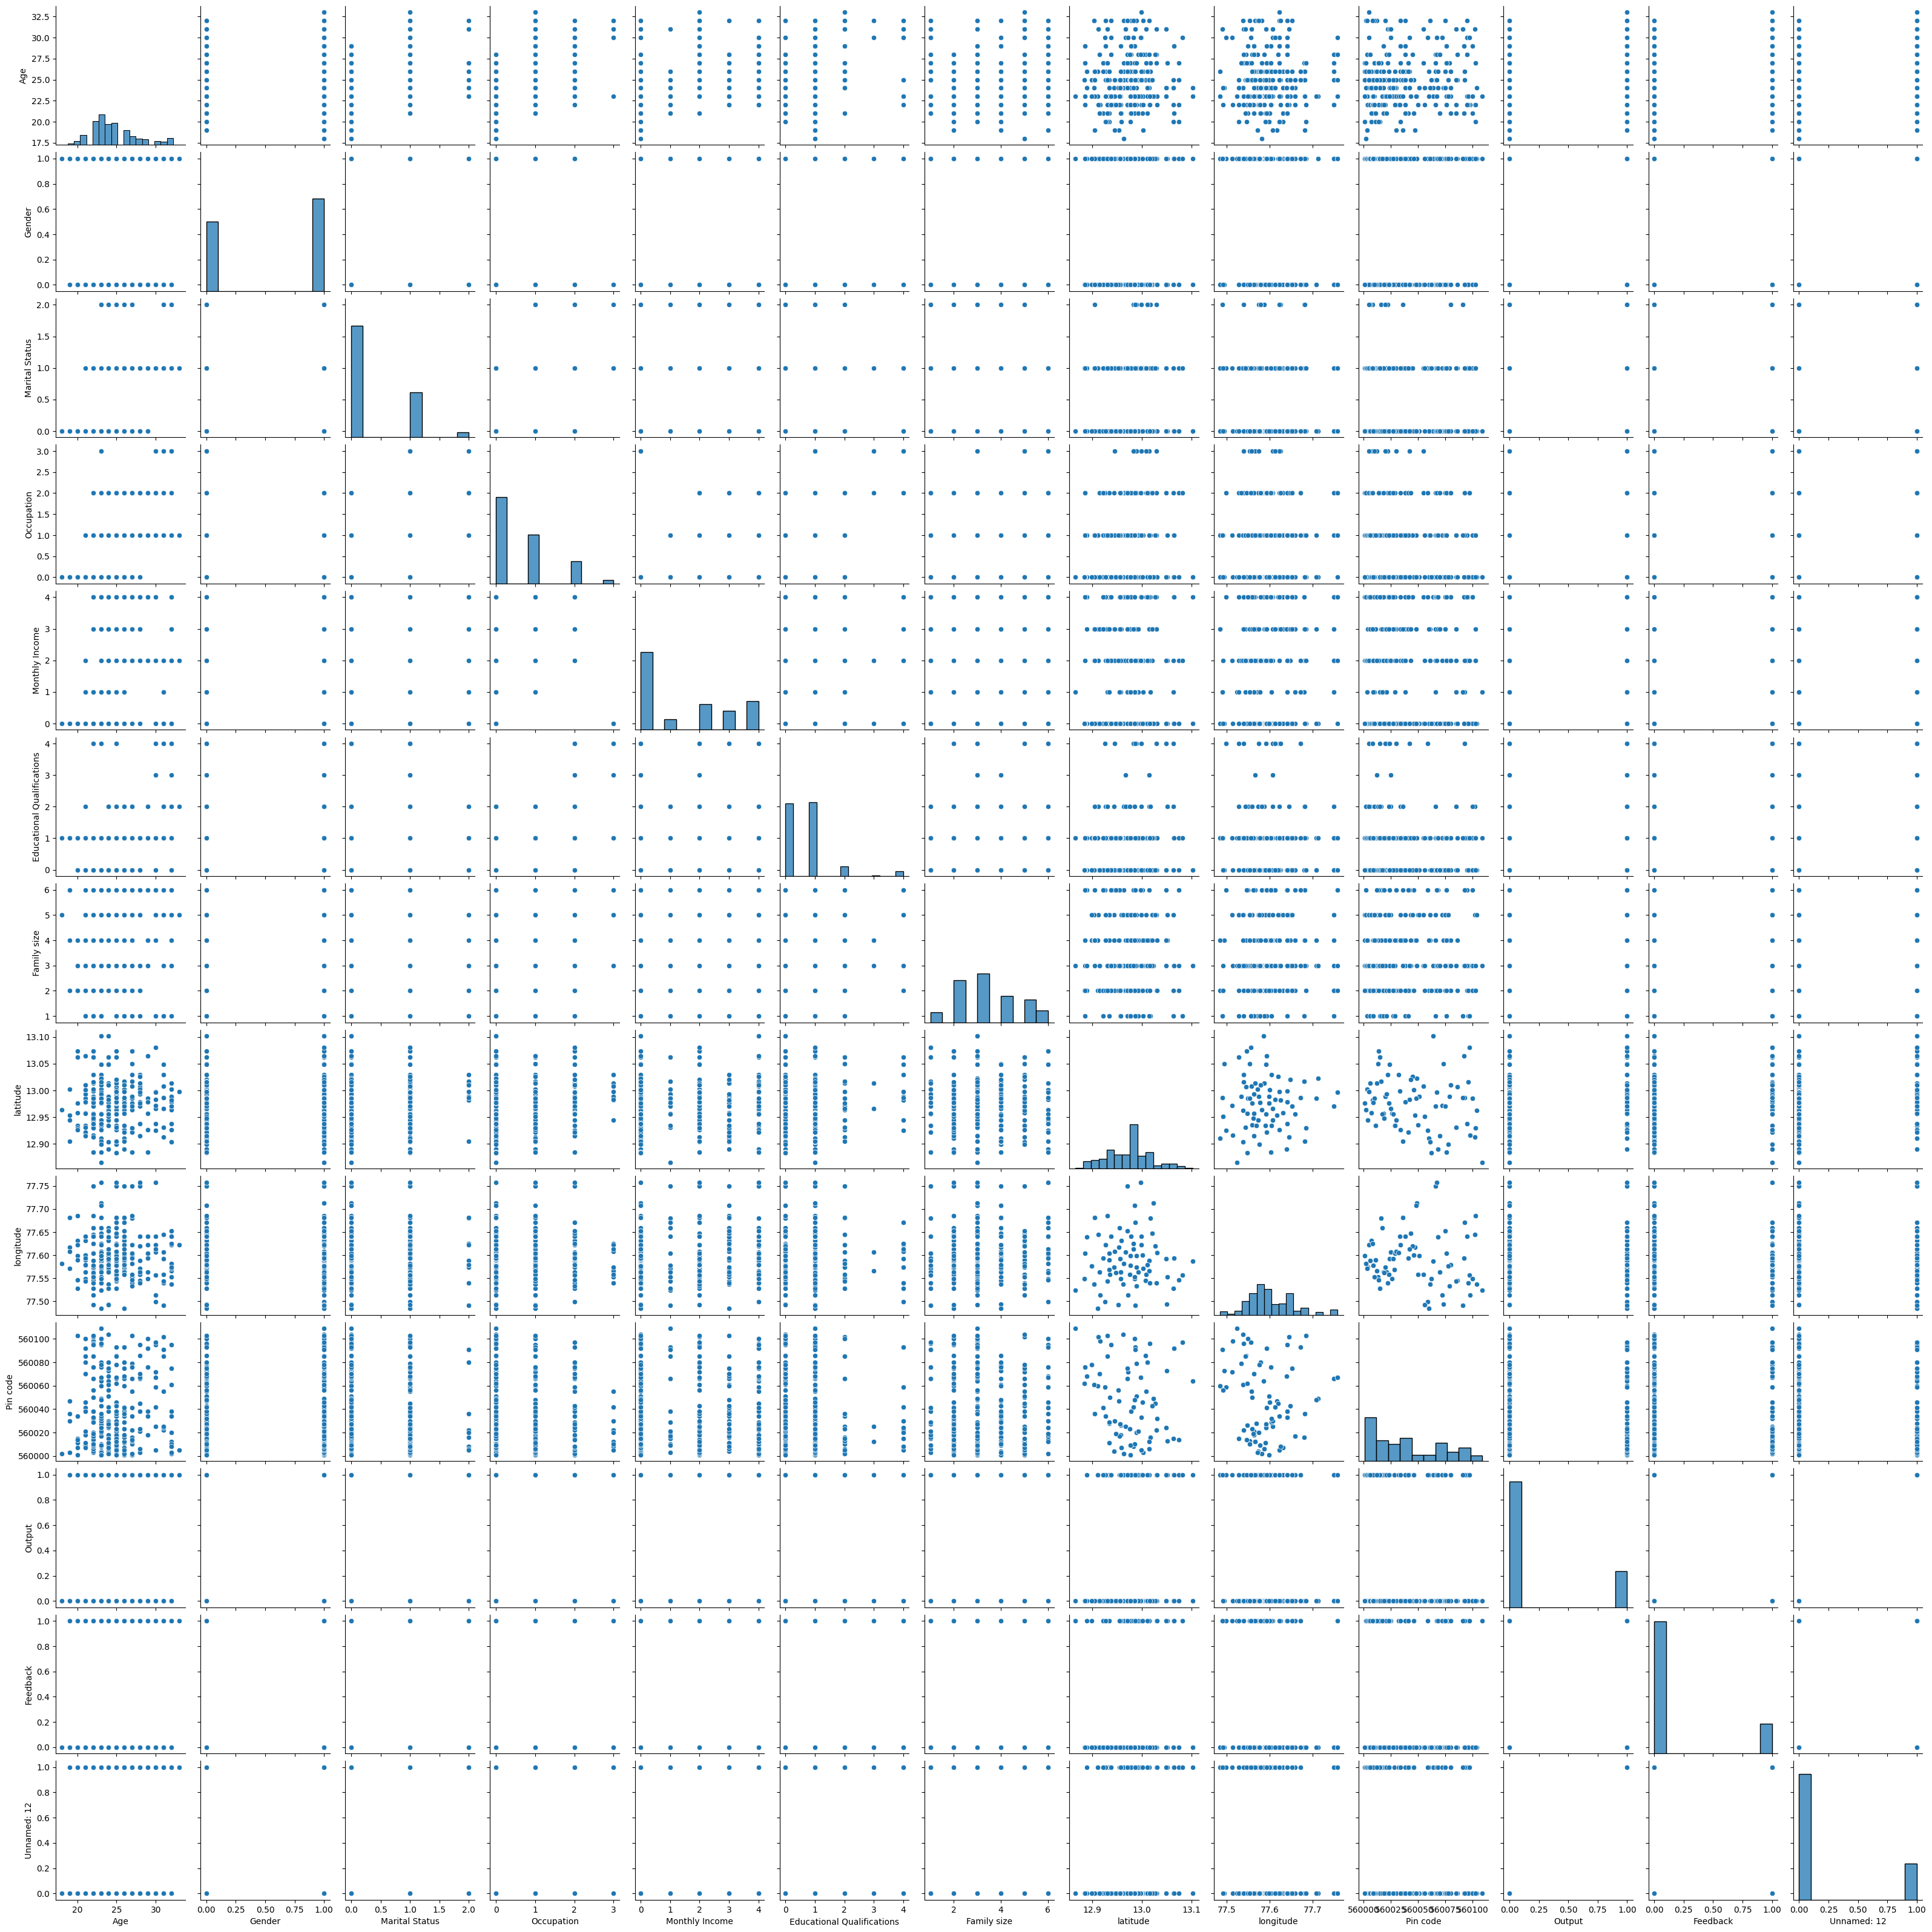

In [41]:
import seaborn as sns

sns.pairplot(df[list(df.columns)])
plt.show()
print()

## Задание 5: Проверка гипотез

Сгенерируйте два шкалированных ряда данных и проверьте статистически значимые различия между ними с использованием t-теста. Визуализируйте эти данные и результаты своего анализа.

In [43]:
from scipy import stats

male_income = df[df['Gender'] == 0]['Monthly Income']
female_income = df[df['Gender'] == 1]['Monthly Income']

t_statistic, p_value = stats.ttest_ind(male_income, female_income)

print('T-статистика:', t_statistic)
print('p-значение:', p_value)


T-статистика: -0.42568241748943
p-значение: 0.6705765177848486


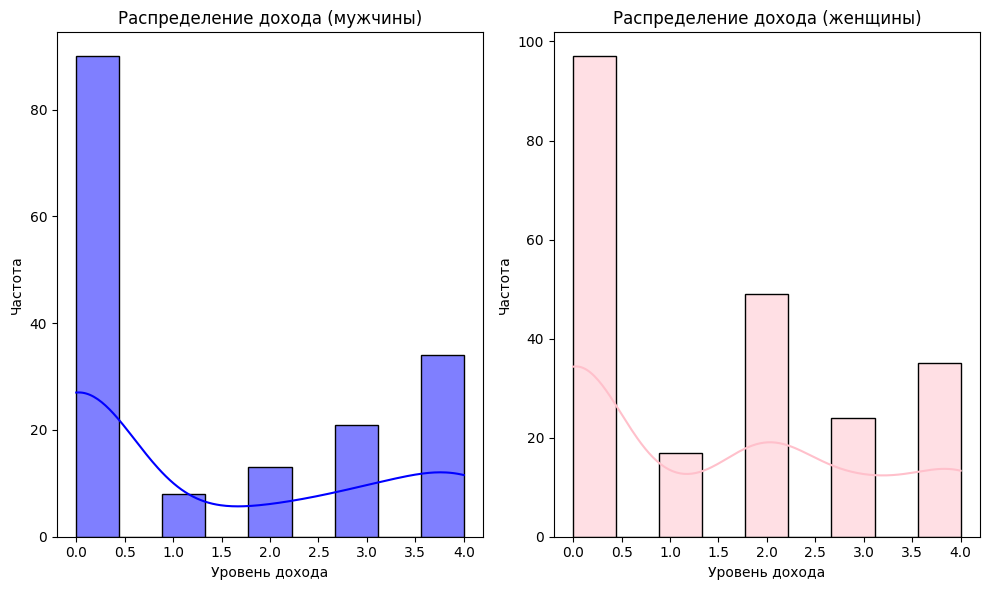

In [44]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(male_income, kde=True, color='blue')
plt.xlabel('Уровень дохода')
plt.ylabel('Частота')
plt.title('Распределение дохода (мужчины)')

plt.subplot(1, 2, 2)
sns.histplot(female_income, kde=True, color='pink')
plt.xlabel('Уровень дохода')
plt.ylabel('Частота')
plt.title('Распределение дохода (женщины)')

plt.tight_layout()
plt.show()


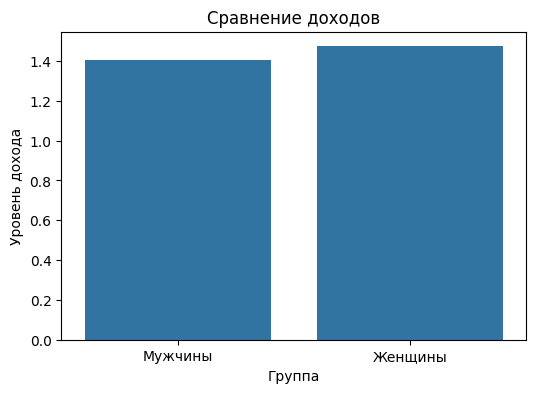

In [45]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Мужчины', 'Женщины'], y=[male_income.mean(), female_income.mean()])
plt.xlabel('Группа')
plt.ylabel('Уровень дохода')
plt.title('Сравнение доходов')
plt.show()